In [2]:
from sklearn.datasets import load_iris
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import rand_score
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
import pandas as pd
from numpy.random import uniform
import matplotlib.pyplot as plt
from random import random
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

iris_ds = load_iris()
customers_ds = pd.read_csv("customers.csv").drop(["Row", "CustomerId"], axis=1)


ds = "iris"

if ds == "iris":
    X = iris_ds['data'][:,:3]
    y = iris_ds['target']
elif ds == "customers":
    customers_ds = customers_ds[~customers_ds.Defaulted.isna()]
    X = customers_ds[['Income', "CardDebt", "OtherDebt"]].values
    y = customers_ds['Defaulted'].values
    
X = scaler.fit_transform(X)

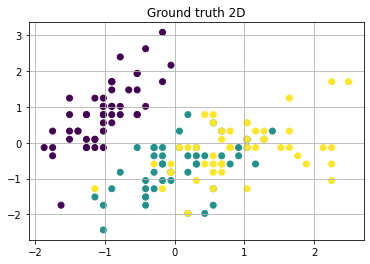

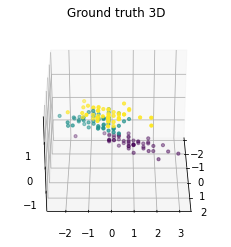

In [3]:
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], c= y)
plt.grid()
plt.title("Ground truth 2D")

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c= y, s=10)
plt.grid()
plt.title("Ground truth 3D")
ax.view_init(elev=30, azim=0)

Noise percent: 0, n_clusters: 3, metric: 0.810917225950783
Noise percent: 0, n_clusters: 4, metric: 0.759910514541387
Noise percent: 0, n_clusters: 5, metric: 0.7611633109619687
Noise percent: 0, n_clusters: 6, metric: 0.734496644295302
Noise percent: 0, n_clusters: 7, metric: 0.7202684563758389
Noise percent: 0, n_clusters: 8, metric: 0.7174944071588367
Noise percent: 0, n_clusters: 9, metric: 0.7242058165548099
Noise percent: 1, n_clusters: 3, metric: 0.8068008948545862
Noise percent: 1, n_clusters: 4, metric: 0.7727069351230426
Noise percent: 1, n_clusters: 5, metric: 0.7670693512304251
Noise percent: 1, n_clusters: 6, metric: 0.7370022371364653
Noise percent: 1, n_clusters: 7, metric: 0.7202684563758389
Noise percent: 1, n_clusters: 8, metric: 0.7505145413870246
Noise percent: 1, n_clusters: 9, metric: 0.7242058165548099
Noise percent: 3, n_clusters: 3, metric: 0.810917225950783
Noise percent: 3, n_clusters: 4, metric: 0.759821029082774
Noise percent: 3, n_clusters: 5, metric: 0.75

/var/folders/r3/kdwhwccs3cn35_k5_3tktnvw0000gn/T/ipykernel_11959/993510394.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


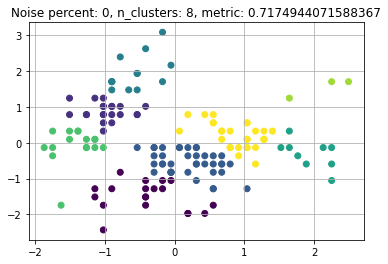

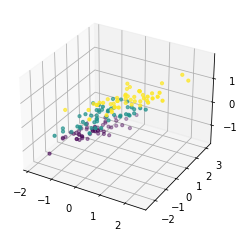

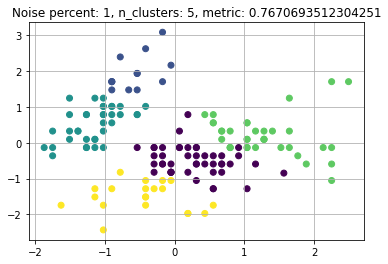

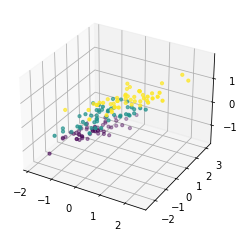

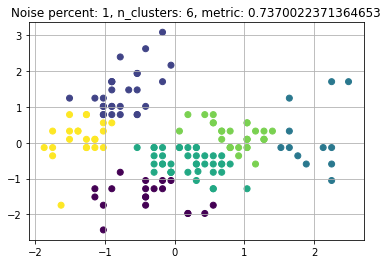

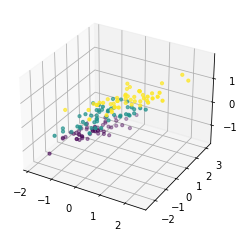

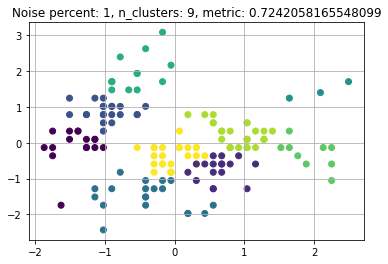

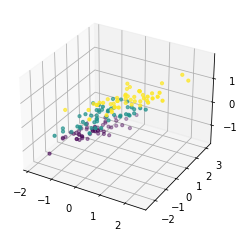

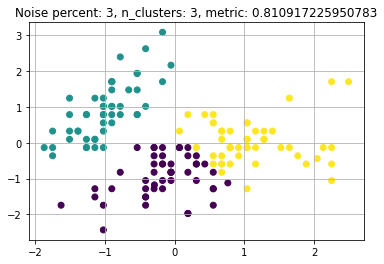

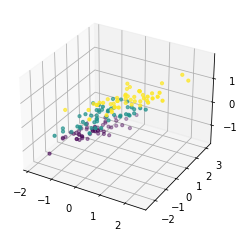

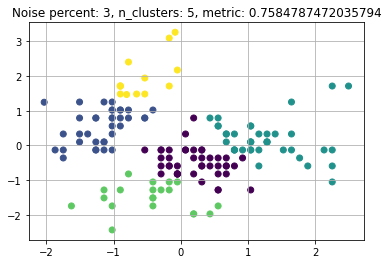

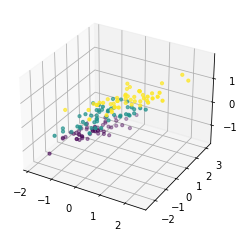

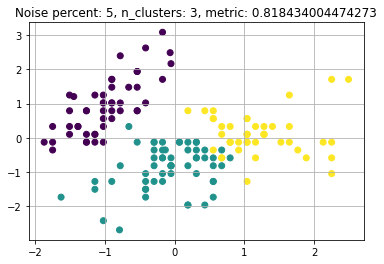

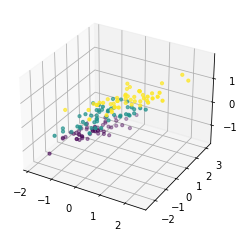

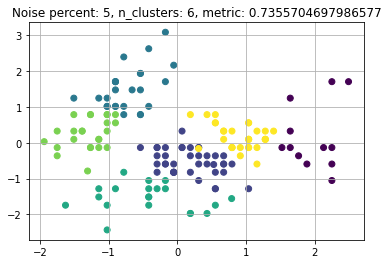

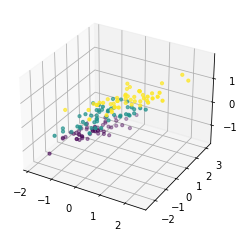

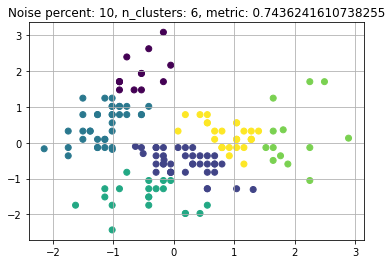

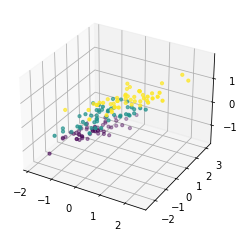

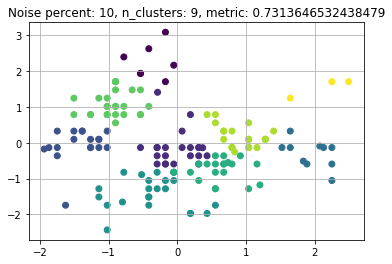

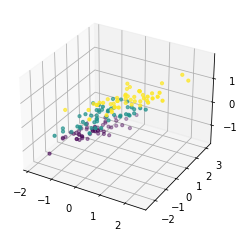

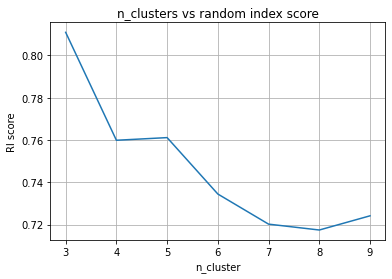

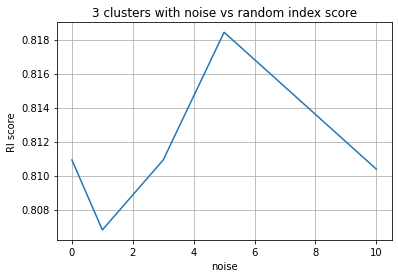

In [6]:
scores = []
n3 = []
n_cl = list(range(3,10))
noisp = [0,1,3,5,10]
for noise_percent in noisp:
    for i in n_cl:
        
        X_noised = X.copy()
        if noise_percent > 0:
            n_rs = int(noise_percent * 0.01)
            rand_arr = uniform(-1,1,(noise_percent, X.shape[1]))
            noise_ind = np.random.choice(list(range(X.shape[0])), noise_percent)
            X_noised[noise_ind] += rand_arr
            
        # km = KMedoids(n_clusters=i)
        km = KMeans(n_clusters=i, n_init=10)
        y_pred = km.fit_predict(X_noised, y)
        ri_score = rand_score(y, y_pred)
        plot_name = f"Noise percent: {noise_percent}, n_clusters: {i}, metric: {ri_score}"
        print(plot_name)
        
        if noise_percent == 0:
            scores.append(ri_score)
        if i == 3:
            n3.append(ri_score)
            
            
        if random() < 0.2:
            fig = plt.figure()
            plt.scatter(X_noised[:,0], X_noised[:,1], c= y_pred)
            plt.grid()
            plt.title(plot_name)

            fig = plt.figure()
            ax = plt.axes(projection='3d')
            ax.scatter(X[:,0], X[:,1], X[:,2], c= y, s=10)
            
            
plt.figure()
plt.title("n_clusters vs random index score")
plt.xlabel("n_cluster")
plt.ylabel("RI score")
plt.grid()
plt.plot(n_cl, scores)

            
plt.figure()
plt.title("3 clusters with noise vs random index score")
plt.xlabel("noise")
plt.ylabel("RI score")
plt.grid()
plt.plot(noisp, n3)